# Sentiment analysis for entertainment media using Natural Language Processing models
This notebook contains the script used to generate the proposed model for sentiment analysis of IMDb reviews.

First of all, run this cell to install the required libraries: 
- pandas
- scikit-learn

In [1]:
%pip install pandas scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import files

#uploaded = files.upload()

In [3]:
# The needed libraries and models are imported for the project
import pandas as pd
import numpy as np

from sklearn.utils import shuffle

from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, classification_report

from sklearn.pipeline import make_pipeline

import re

import matplotlib.pyplot as plt

In [4]:
# The dataset is read from the file stored in the main folder
url = "https://raw.githubusercontent.com/JesusRdzT/imdb-sentiment-analysis/main/dataset/IMDB%20Dataset.csv"
dataset = pd.read_csv(url)

## Data Cleaning Functions
For the data cleaning process, we check in the datasets for HTML tags and Special Characters. Also, we turn all the records to lowercase

In [5]:
htmlRegex = re.compile('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')
specialCharacters = re.compile(r"[^a-zA-Z0-9 ]")

def removeSpecialCharacters(column):
  return column.apply(lambda x: re.sub(specialCharacters, "", x))

def removeHTMLCode(column):
  return column.apply(lambda x: re.sub(htmlRegex, "", x))

def convertToLower(column):
  return column.apply(str.lower)

def cleanData(dataframeColumn):
  dataframeColumn = convertToLower(dataframeColumn)
  dataframeColumn = removeHTMLCode(dataframeColumn)
  dataframeColumn = removeSpecialCharacters(dataframeColumn)
  return dataframeColumn


dataset['review'] = cleanData(dataset['review'])
dataset['sentiment'] = cleanData(dataset['sentiment'])

## Preparing the testing and training datasets

In [6]:
def startTrainingAndTestingData(seed):
  # The positive and negative reviews are filtered on separate datasets
  positiveReviews = dataset[(dataset["sentiment"] == "positive")]
  negativeReviews = dataset[(dataset["sentiment"] == "negative")]

  # Two series of data are obtained from the positive reviews. One for the input and the other for the output
  positiveInput = positiveReviews["review"].values
  positiveOutput = positiveReviews["sentiment"].values

  # Two series of data are obtained from the negative reviews. One for the input and the other for the output
  negativeInput = negativeReviews["review"].values
  negativeOutput = negativeReviews["sentiment"].values

  # The training and testing series of inputs and outputs are created
  pInput_train, pInput_test, pOutput_train, pOutput_test = train_test_split(positiveInput, positiveOutput, train_size = 0.50, random_state = seed)
  nInput_train, nInput_test, nOutput_train, nOutput_test = train_test_split(negativeInput, negativeOutput, train_size = 0.50, random_state = seed)

  # Positive and negative inputs and outputs are concatenated for training
  train_input = np.concatenate((nInput_train, pInput_train), axis = 0)
  train_output = np.concatenate((nOutput_train, pOutput_train), axis = 0)

  # Positive and negative inputs and outputs are concatenated for testing
  test_input = np.concatenate((nInput_test, pInput_test), axis = 0)
  test_output = np.concatenate((nOutput_test, pOutput_test), axis = 0)

  # The dataframe is shuffled to get random testin groups
  shIn, shOut = shuffle(test_input, test_output, random_state = 12345)

  return train_input, train_output, shIn, shOut

## Model pipeline
The defined pipeline for the Classification model is the following: 
1. It tokenizes and gives weights to the tokens based on their frequency in each document
2. The classification model is declared with an initial configuration
3. The model is trained with a trainin input and output collection

## Model evaluation logic
The function evaluateModel was declared. It takes the expected outputs and the model predictions to evaluate the following with its confusion matrix: 
- Accuracy
- Precision
- Recall
- F1-Score

In [7]:
vectorizer = TfidfVectorizer(stop_words="english")

In [8]:
# Proposed Model #1: SVC model with "rbf" (Euler) kernel
def createAndTrainLinearSVCModel(input, output, model_name):
  # A LinearSVC model with Tfidf vectorization is created
  # A SVC with "linear" kernel (kLinear) and Tfidf vectorization is created
  linearTfidf = make_pipeline(vectorizer, LinearSVC(max_iter= 4000))
  kLinearTfidf.fit(input, output)

  return kLinearTfidf

# Proposed Model #2: SVC model with "linear" kernel
def createAndTrainLinearSVCModel(input, output, model_name):
  # A LinearSVC model with Tfidf vectorization is created
  linearTfidf = make_pipeline(vectorizer, LinearSVC(max_iter= 4000))
  linearTfidf.fit(input, output) # Trains the model

  return linearTfidf, model_name

def predictResultsFromModel(model, input, model_name):
  predictions = model.predict(input)
  return predictions, model_name

def evaluateModel(outputTest, predictions, model_name):
    # Generates the confusion matrix for this model
    confusionMatrix = confusion_matrix(outputTest, predictions)
    # Generates the classification report of the model's predictions
    report = classification_report(outputTest, predictions)
    
    print("Model:", model_name)
    print("Confusion Matrix: ")
    print(confusionMatrix)

    print("Classification scores: ")
    print(report)

    return confusionMatrix, report, model_name

## Functions to run the classification process with a given random seed

In [13]:
def createAndTrainLinearSVCModel(input, output, model_name):
  # A LinearSVC model with Tfidf vectorization is created
  linearTfidf = make_pipeline(vectorizer, LinearSVC(max_iter= 4000))
  linearTfidf.fit(input, output) # Trains the model

  return linearTfidf, model_name

def predictResultsFromModel(model, input, model_name):
  predictions = model.predict(input)
  return predictions, model_name

def evaluateModel(outputTest, predictions, model_name):
    # Generates the confusion matrix for this model
    confusionMatrix = confusion_matrix(outputTest, predictions)
    # Generates the classification report of the model's predictions
    report = classification_report(outputTest, predictions)
    
    print("Model:", model_name)
    print("Confusion Matrix: ")
    print(confusionMatrix)

    print("Classification scores: ")
    print(report)

    return confusionMatrix, report, model_name

def plot_pie_chart(correct_predictions, total_predictions, model_name):
    labels = ['Correct Predictions', 'Incorrect Predictions']
    sizes = [correct_predictions, total_predictions - correct_predictions]
    colors = ['#98DDAA', '#FF9999']
    explode = (0.1, 0)

    fig, ax = plt.subplots()
    ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
           shadow=True, startangle=90)
    ax.axis('equal')
    ax.set_title(f"Prediction Accuracy - {model_name}")

    plt.show()



def runClassificator(seed, model_name):
  # Create a new training and testing datasets based on a random seed
  trainInput, trainOutput, testInput, testOutput = startTrainingAndTestingData(seed)

  # Divides the testing dataset into 5 groups of 5000 records.
  t1In, t1Out = testInput[0:5000], testOutput[0:5000]
  t2In, t2Out = testInput[5000:10000], testOutput[5000:10000]
  t3In, t3Out = testInput[10000:15000], testOutput[10000:15000]
  t4In, t4Out = testInput[15000:20000], testOutput[15000:20000]
  t5In, t5Out = testInput[20000:25000], testOutput[20000:25000]

  # Generates and trains a new linearSVC model with a base trainInput and trainOutput
  model, model_name = createAndTrainLinearSVCModel(trainInput, trainOutput, model_name)

  # Uses the generated model to predict classifications with the 5 groups
  prediction1, model_name = predictResultsFromModel(model, t1In, model_name)
  prediction2, model_name = predictResultsFromModel(model, t2In, model_name)
  prediction3, model_name = predictResultsFromModel(model, t3In, model_name)
  prediction4, model_name = predictResultsFromModel(model, t4In, model_name)
  prediction5, model_name = predictResultsFromModel(model, t5In, model_name)

  # Evaluates the prediction results from the model
  confusionMatrix1, report1, model_name = evaluateModel(t1Out, prediction1, model_name)
  confusionMatrix2, report2, model_name = evaluateModel(t2Out, prediction2, model_name)
  confusionMatrix3, report3, model_name = evaluateModel(t3Out, prediction3, model_name)
  confusionMatrix4, report4, model_name = evaluateModel(t4Out, prediction4, model_name)
  confusionMatrix5, report5, model_name = evaluateModel(t5Out, prediction5, model_name)

  # Print the results with the random seed number
  print(f"Random Seed {seed}")
  print(f"Model: {model_name}")
  print("Confusion Matrix:")
  print(confusionMatrix1)
  print(report1)
  print()

  correct_predictions = confusionMatrix1[0, 0] + confusionMatrix1[1, 1]
  total_predictions = np.sum(confusionMatrix1)

    # Plot the pie chart for prediction accuracy
  plot_pie_chart(correct_predictions, total_predictions, model_name)


Model: Model 1
Confusion Matrix: 
[[2249  292]
 [ 230 2229]]
Classification scores: 
              precision    recall  f1-score   support

    negative       0.91      0.89      0.90      2541
    positive       0.88      0.91      0.90      2459

    accuracy                           0.90      5000
   macro avg       0.90      0.90      0.90      5000
weighted avg       0.90      0.90      0.90      5000

Model: Model 1
Confusion Matrix: 
[[2217  286]
 [ 242 2255]]
Classification scores: 
              precision    recall  f1-score   support

    negative       0.90      0.89      0.89      2503
    positive       0.89      0.90      0.90      2497

    accuracy                           0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000

Model: Model 1
Confusion Matrix: 
[[2171  288]
 [ 243 2298]]
Classification scores: 
              precision    recall  f1-score   support

    negative       0.90      0.88   

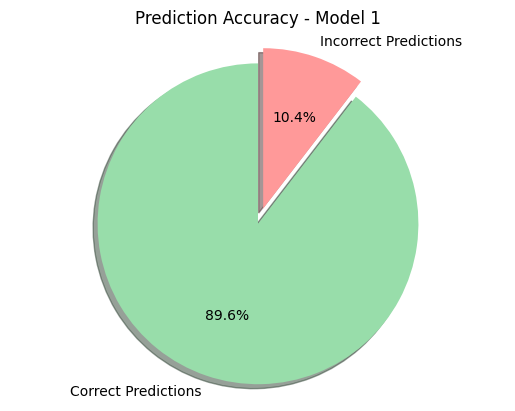

Model: Model 2
Confusion Matrix: 
[[2223  318]
 [ 284 2175]]
Classification scores: 
              precision    recall  f1-score   support

    negative       0.89      0.87      0.88      2541
    positive       0.87      0.88      0.88      2459

    accuracy                           0.88      5000
   macro avg       0.88      0.88      0.88      5000
weighted avg       0.88      0.88      0.88      5000

Model: Model 2
Confusion Matrix: 
[[2167  336]
 [ 258 2239]]
Classification scores: 
              precision    recall  f1-score   support

    negative       0.89      0.87      0.88      2503
    positive       0.87      0.90      0.88      2497

    accuracy                           0.88      5000
   macro avg       0.88      0.88      0.88      5000
weighted avg       0.88      0.88      0.88      5000

Model: Model 2
Confusion Matrix: 
[[2171  288]
 [ 268 2273]]
Classification scores: 
              precision    recall  f1-score   support

    negative       0.89      0.88   

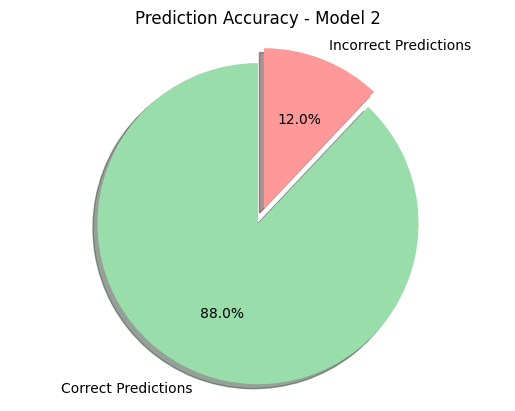

Model: Model 3
Confusion Matrix: 
[[2237  304]
 [ 246 2213]]
Classification scores: 
              precision    recall  f1-score   support

    negative       0.90      0.88      0.89      2541
    positive       0.88      0.90      0.89      2459

    accuracy                           0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000

Model: Model 3
Confusion Matrix: 
[[2197  306]
 [ 251 2246]]
Classification scores: 
              precision    recall  f1-score   support

    negative       0.90      0.88      0.89      2503
    positive       0.88      0.90      0.89      2497

    accuracy                           0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000

Model: Model 3
Confusion Matrix: 
[[2154  305]
 [ 243 2298]]
Classification scores: 
              precision    recall  f1-score   support

    negative       0.90      0.88   

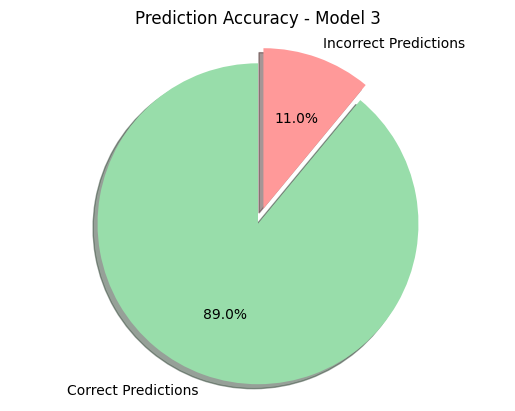

In [14]:
# Runs the LinearSVC classifier 3 different times. Each time it uses a new 
# random seed to generate a different training set for the model
runClassificator(123457890, "Model 1")
runClassificator(543219283, "Model 2")
runClassificator(102930187, "Model 3")
